In [3]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load breast cancer data
df = pd.read_csv('.\\Breast_Cancer.csv')
df = pd.DataFrame(df)

In [5]:
# Check if there are missing values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [6]:
print(df.columns.tolist())

['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


The average age of women in this dataset is ~54 years old. Breast cancer patients tend to be in older age groups but it is not 
uncommon to see women with breast cancer in their late 30s or 40s as we see in this dataset.

Age Statistics
count    4024.000000
mean       53.972167
std         8.963134
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: Age, dtype: float64


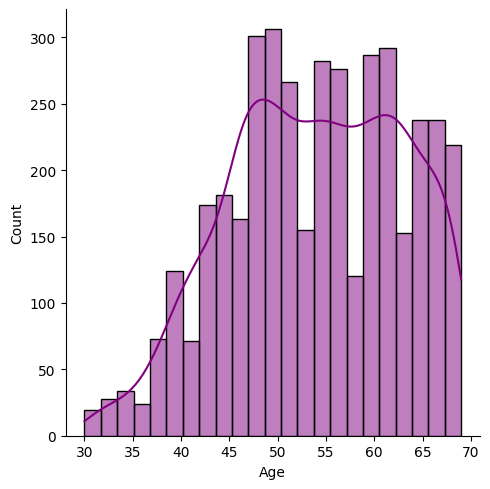

In [25]:
# Histogram of ages
sns.displot(data=df, x="Age", kind="hist", kde = True, color="purple")
print("Age Statistics")
print(df["Age"].describe())


<AxesSubplot: xlabel='Age'>

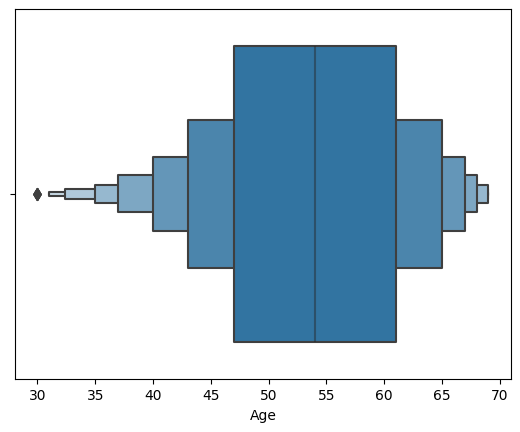

In [23]:
# Boxenplot of ages
sns.boxenplot(data=df, x="Age")

In [66]:
# initial subsetted dataframe by n-stage and status
df_subset = df.groupby(by=["N Stage", "Status"])["Status"].count().unstack()
print(df_subset)

Status   Alive  Dead
N Stage             
N1        2462   270
N2         655   165
N3         291   181


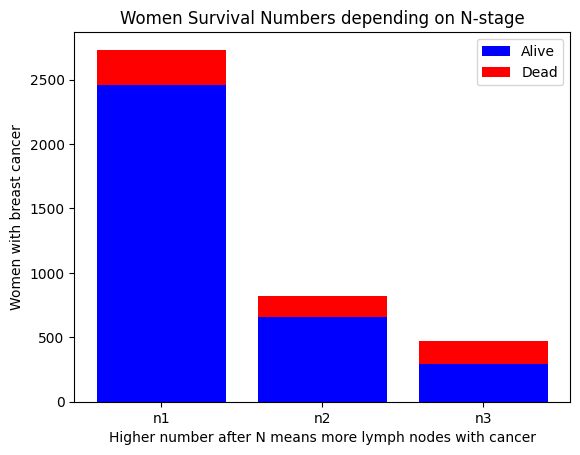

In [6]:
# build plot
n_alive = [df_nstage_count[0], df_nstage_count[2], df_nstage_count[4]]
n_dead = [df_nstage_count[1], df_nstage_count[3], df_nstage_count[5]]
labels = ['n1', 'n2', 'n3']
xlab = 'Higher number after N means more lymph nodes with cancer'
ylab = 'Women with breast cancer'


plt.bar(labels, n_alive, color = 'b')
plt.bar(labels, n_dead, bottom = n_alive, color = 'r')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend(['Alive', 'Dead'])
plt.title('Women Survival Numbers depending on N-stage')
plt.show()

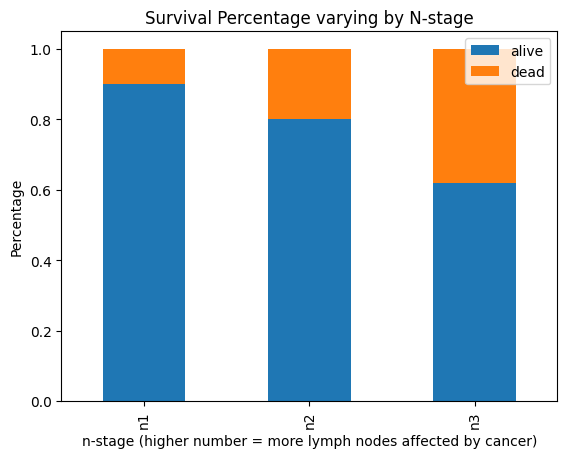

In [7]:
# Stacked Bar Percentage Visualization n-stage vs surivival
d1 = {'nstage': labels, 'alive': n_alive, 'dead': n_dead}
df_percentage = pd.DataFrame(d1)
df_total = df_percentage["alive"] + df_percentage["dead"]
df_percentage["alive"] = round((df_percentage["alive"] / df_total), 2)
df_percentage["dead"] = round((df_percentage["dead"] / df_total), 2)

df_percentage.plot(
  x = 'nstage',
  kind ='bar',
  stacked=True,
  title = "Survival Percentage varying by N-stage")

plt.xlabel('n-stage (higher number = more lymph nodes affected by cancer)')
plt.ylabel('Percentage')
plt.show()